<a href="https://colab.research.google.com/github/KonstantinSV/project_bank_client/blob/main/project_bank_client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Проект: Cнижение клиентооборота**

Цель - обучить модель предсказывающую уйдёт клиент из банка в ближайшее время или нет.

Данные для обучения:

Датасет на Kaggle - https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

# Предварительная обработка данных и исследование задачи

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/project_bank_client/Churn_Modelling.csv')

In [3]:
# Размеры DataFrame
df.shape

(10000, 14)

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


В данном датасете 10000 объектов, 13 признаков и один целевой.

In [6]:
# Проверка df на наличие пропущенных значений.
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверка показала, что в df нет пропущенных значений.

In [7]:
# Признаки RowNumber, EstimatedSalary, CustomerId, Surname являются неинформативными, их следует удалить.
del_col=['RowNumber','EstimatedSalary','CustomerId','Surname']
df=df.drop(del_col,axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int64  
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Tenure          10000 non-null  int64  
 5   Balance         10000 non-null  float64
 6   NumOfProducts   10000 non-null  int64  
 7   HasCrCard       10000 non-null  int64  
 8   IsActiveMember  10000 non-null  int64  
 9   Exited          10000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 781.4+ KB


In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,0
9997,709,France,Female,36,7,0.00,1,0,1,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,1


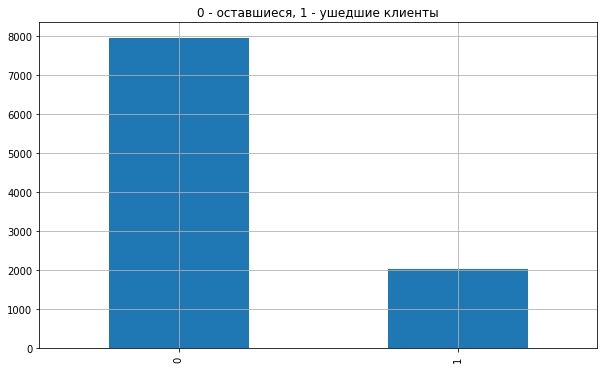

In [10]:
# Гистограмма значений ушедших и оставшихся клиентов
df['Exited'].value_counts().plot(kind='bar',grid=True,figsize=(10,6),title='0 - оставшиеся, 1 - ушедшие клиенты')

Соотношение оттока и оставшихся 1:4. Вывод: такое соотношение говорит, что присутствует дисбаланс в данных.

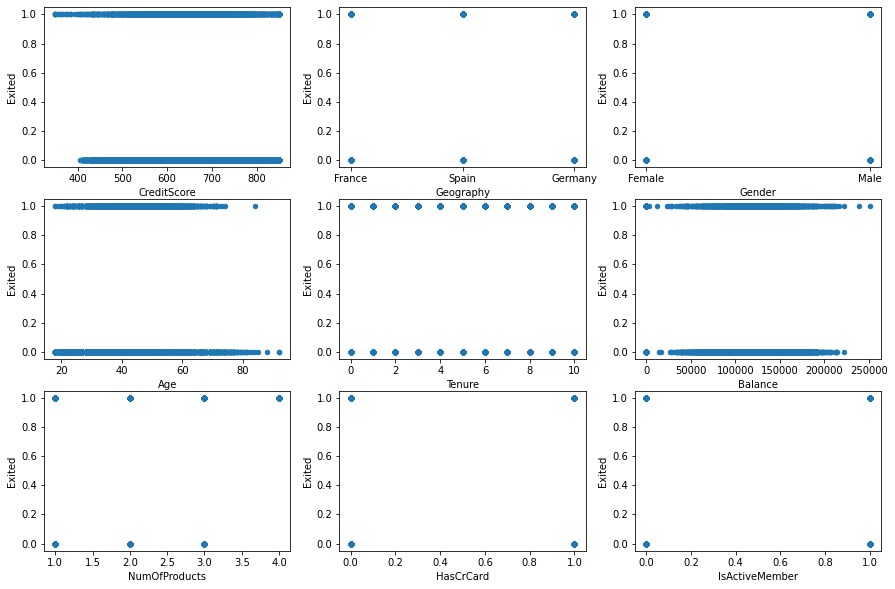

In [11]:
# Графики показывают зависимость целевого признака от остальных.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10)) # fig = plt.figure(), axes = fig.add_subplot()
for idx, feature in enumerate(df.columns[:-1]):
   df.plot(feature, "Exited", subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3])

Ярко выраженной линейной зависимости не наблюдается

In [12]:
# Корреляция  Пирсона
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.156128
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,1.000000


У признаков наблюдается слабая корреляция между собой и с целевым признаком.

**Преобразование данных**

In [13]:
# Кодирование категориальных признаков методом "One hot encoder"
df = pd.get_dummies(df, drop_first=True)

# Выделение целевого признака и остальные признаков
target=df['Exited'] 
features=df.drop(['Exited'], axis=1)

In [14]:
# Разделение данных на обучающую и проверочную выборки
train_features, valid_features, train_target, valid_target=train_test_split(features, target, test_size=0.20, random_state=2020)

In [15]:
# Стандартизация обучающей и проверочной выборки
numeric=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember']
scaler=StandardScaler()
scaler.fit(train_features[numeric])
train_features[numeric]=scaler.transform(train_features[numeric])
valid_features[numeric]=scaler.transform(valid_features[numeric])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

# Обучение моделей на несбалансированных данных

**Decision tree**

In [16]:
# Цикл ищет лучший гиперпораметр max_depth для Decision tree
for depth in range(1,10,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=2020).fit(train_features,train_target)
    prediction=model_tree.predict(valid_features)
    print('max_depth:',depth,'F1:',f1_score(valid_target,prediction))

max_depth: 1 F1: 0.0
max_depth: 2 F1: 0.5321888412017167
max_depth: 3 F1: 0.40441176470588236
max_depth: 4 F1: 0.5366614664586583
max_depth: 5 F1: 0.5440251572327044
max_depth: 6 F1: 0.5637795275590551
max_depth: 7 F1: 0.5765230312035661
max_depth: 8 F1: 0.573134328358209
max_depth: 9 F1: 0.5760233918128655


Лучшее значение max_depth=7, при котором F1=0.576

**Random forest**


In [19]:
# Цикл ищет лучший гиперпораметр max_depth для Random forest
for max_depth in range(1,20,1):
    model_forest=RandomForestClassifier(max_depth=max_depth,n_estimators=50,random_state=2020).fit(train_features,train_target)
    prediction=model_forest.predict(valid_features)
    print('max_depth:',max_depth,'F1:',f1_score(valid_target,prediction))

max_depth: 1 F1: 0.0
max_depth: 2 F1: 0.17787418655097614
max_depth: 3 F1: 0.189247311827957
max_depth: 4 F1: 0.38649155722326456
max_depth: 5 F1: 0.48263888888888895
max_depth: 6 F1: 0.5409015025041736
max_depth: 7 F1: 0.5691318327974276
max_depth: 8 F1: 0.5786163522012578
max_depth: 9 F1: 0.5882352941176471
max_depth: 10 F1: 0.5929339477726574
max_depth: 11 F1: 0.5987841945288754
max_depth: 12 F1: 0.605421686746988
max_depth: 13 F1: 0.5901639344262296
max_depth: 14 F1: 0.5961251862891207
max_depth: 15 F1: 0.6032210834553441
max_depth: 16 F1: 0.5929203539823009
max_depth: 17 F1: 0.6028571428571429
max_depth: 18 F1: 0.5901162790697674
max_depth: 19 F1: 0.5904486251808974


Лучшее значение max_depth=12, при котором F1=0.605

In [21]:
# Цикл ищет лучший гиперпораметр n_estimators (количество деревьев)
for estim in range(1,70,2):
    model_forest=RandomForestClassifier(max_depth=12,n_estimators=estim,random_state=2020).fit(train_features, train_target)
    prediction=model_forest.predict(valid_features)
    print('estim',estim,'F1:',f1_score(valid_target, prediction))

estim 1 F1: 0.5086551264980027
estim 3 F1: 0.5582047685834501
estim 5 F1: 0.5428571428571428
estim 7 F1: 0.561863173216885
estim 9 F1: 0.5776487663280115
estim 11 F1: 0.577319587628866
estim 13 F1: 0.5781710914454278
estim 15 F1: 0.5852941176470587
estim 17 F1: 0.5816023738872403
estim 19 F1: 0.573134328358209
estim 21 F1: 0.5705705705705706
estim 23 F1: 0.5684210526315789
estim 25 F1: 0.5827010622154781
estim 27 F1: 0.5866261398176292
estim 29 F1: 0.5878787878787879
estim 31 F1: 0.5912518853695324
estim 33 F1: 0.5878787878787879
estim 35 F1: 0.5891238670694865
estim 37 F1: 0.5869894099848714
estim 39 F1: 0.5933734939759037
estim 41 F1: 0.5969696969696969
estim 43 F1: 0.5951661631419939
estim 45 F1: 0.5930408472012103
estim 47 F1: 0.6012084592145014
estim 49 F1: 0.6033182503770739
estim 51 F1: 0.6045112781954888
estim 53 F1: 0.6066066066066066
estim 55 F1: 0.6066066066066066
estim 57 F1: 0.6077844311377245
estim 59 F1: 0.5988023952095808
estim 61 F1: 0.5945945945945946
estim 63 F1: 0.6

Лучшее значение n_estimators=57 при котором F1=0.607

**Logistic regression**

In [23]:
model_logistic=LogisticRegression().fit(train_features,train_target)
prediction=model_logistic.predict(valid_features)
print('F1:',f1_score(valid_target,prediction))

F1: 0.33391304347826095


Для Logistic regression F1=0.333

In [24]:
# Обучение модели Random forest с параметрами показавшими лучшую F-метрику (max_depth=9 и n_estimators=41)
model_forest = RandomForestClassifier(max_depth=12, n_estimators=57, random_state=2020).fit(train_features, train_target)
prediction = model_forest.predict(valid_features)
print(f1_score(valid_target, prediction))

0.6077844311377245


**Вывод:**


Лучшее значение F1 меры показала модель Random forest. При значениях max_depth=12 и n_estimators=57 F1 мера =0.607

# Обучение моделей на сбалансированных данных

**Балансировка данных**

In [25]:
# Функция увеличивает количество ушедших клиентов (target==1)
def upsampling (features,target,repeat):
    #Разделяем выборку по значениям целевой функции
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    
    #Увеличиваем и соединяем обратно
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    
    # Перемешиваем
    upsampling_features, upsampling_target = shuffle(upsampling_features, upsampling_target, random_state=2020)
    
    return upsampling_features,upsampling_target

In [26]:
features_balance_up, target_balance_up = upsampling(train_features, train_target,4)

**Обучение модели Decision tree на сбалансированных данных**

In [27]:
%%time
for depth in range(1,20,1):
    model_tree = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, random_state=2020).fit(features_balance_up, target_balance_up)
    prediction = model_tree.predict(valid_features)
    print('max_depth:',depth,'F1:',f1_score(valid_target, prediction))

max_depth: 1 F1: 0.5061611374407584
max_depth: 2 F1: 0.531104921077066
max_depth: 3 F1: 0.531104921077066
max_depth: 4 F1: 0.5693822739480752
max_depth: 5 F1: 0.5862361937128292
max_depth: 6 F1: 0.6001829826166515
max_depth: 7 F1: 0.5838509316770186
max_depth: 8 F1: 0.5944272445820434
max_depth: 9 F1: 0.577570093457944
max_depth: 10 F1: 0.5793650793650794
max_depth: 11 F1: 0.563297350343474
max_depth: 12 F1: 0.5537190082644629
max_depth: 13 F1: 0.5424083769633508
max_depth: 14 F1: 0.5286343612334802
max_depth: 15 F1: 0.5062146892655367
max_depth: 16 F1: 0.5106861642294713
max_depth: 17 F1: 0.5086306098964327
max_depth: 18 F1: 0.5
max_depth: 19 F1: 0.5042016806722689
CPU times: user 749 ms, sys: 8.05 ms, total: 757 ms
Wall time: 744 ms


Лучшее значение max_depth=6 при котором F1=0.600.

**Обучение модели Random forest на сбалансированных данных**

In [28]:
%%time
for max_depth in range(1,20,1):
    model_forest=RandomForestClassifier(class_weight='balanced',max_depth=max_depth,n_estimators=50,random_state=2020).fit(features_balance_up,target_balance_up)
    prediction=model_forest.predict(valid_features)
    print('max_depth:',max_depth,'F1:',f1_score(valid_target,prediction))

max_depth: 1 F1: 0.534466477809254
max_depth: 2 F1: 0.5372290292177192
max_depth: 3 F1: 0.5744274809160306
max_depth: 4 F1: 0.6055226824457594
max_depth: 5 F1: 0.6149253731343283
max_depth: 6 F1: 0.6120434353405726
max_depth: 7 F1: 0.6170634920634921
max_depth: 8 F1: 0.6195761856710393
max_depth: 9 F1: 0.610134436401241
max_depth: 10 F1: 0.6190975865687304
max_depth: 11 F1: 0.6233766233766233
max_depth: 12 F1: 0.6153846153846153
max_depth: 13 F1: 0.6129398410896708
max_depth: 14 F1: 0.6132075471698114
max_depth: 15 F1: 0.6275946275946276
max_depth: 16 F1: 0.6140567200986435
max_depth: 17 F1: 0.6284289276807979
max_depth: 18 F1: 0.6192893401015228
max_depth: 19 F1: 0.6126126126126126
CPU times: user 9.47 s, sys: 47.7 ms, total: 9.52 s
Wall time: 9.51 s


Лучшее значение max_depth=17 при котором F1=0.6284.

In [29]:
%%time
for estim in range(1,55,1):
    model_forest = RandomForestClassifier(class_weight='balanced', max_depth=17, n_estimators=estim, random_state=2020).fit(features_balance_up, target_balance_up)
    prediction = model_forest.predict(valid_features)
    print('estim',estim,'F1:', f1_score(valid_target, prediction))

estim 1 F1: 0.5053763440860215
estim 2 F1: 0.4903581267217631
estim 3 F1: 0.5635103926096998
estim 4 F1: 0.5540897097625329
estim 5 F1: 0.5876777251184834
estim 6 F1: 0.5751295336787565
estim 7 F1: 0.5988023952095807
estim 8 F1: 0.5982028241335045
estim 9 F1: 0.6189889025893959
estim 10 F1: 0.6089171974522293
estim 11 F1: 0.6195786864931846
estim 12 F1: 0.6116129032258064
estim 13 F1: 0.6142322097378277
estim 14 F1: 0.6141935483870967
estim 15 F1: 0.6274509803921569
estim 16 F1: 0.6232790988735921
estim 17 F1: 0.6279357231149568
estim 18 F1: 0.6188679245283019
estim 19 F1: 0.6191646191646193
estim 20 F1: 0.6206030150753769
estim 21 F1: 0.6280788177339901
estim 22 F1: 0.6136363636363638
estim 23 F1: 0.6182266009852218
estim 24 F1: 0.6248431618569635
estim 25 F1: 0.6279357231149568
estim 26 F1: 0.628140703517588
estim 27 F1: 0.6328800988875154
estim 28 F1: 0.6368159203980099
estim 29 F1: 0.6305418719211823
estim 30 F1: 0.6293532338308458
estim 31 F1: 0.6354679802955664
estim 32 F1: 0.636

Лучшее значение n_estimators=49 при котором F1=0.639

**Обучение модели Logistic regression на сбалансированных данных**

In [30]:
%%time
model_logistic=LogisticRegression(class_weight='balanced',solver='liblinear').fit(features_balance_up,target_balance_up)
prediction=model_logistic.predict(valid_features)
print('F1:',f1_score(valid_target,prediction))

F1: 0.5017182130584192
CPU times: user 36.9 ms, sys: 1.03 ms, total: 38 ms
Wall time: 37.4 ms


In [31]:
# Обучение модели с параметрами показавшими лучшую F-метрику (max_depth=17 и n_estimators=49)
model_forest = RandomForestClassifier(class_weight='balanced', max_depth=17, n_estimators=49, random_state=2020).fit(features_balance_up, target_balance_up)
prediction = model_forest.predict(valid_features)
print(f1_score(valid_target, prediction))

0.6393034825870646


Вывод: Мера F1 немного улучшилась. На несбалансированных данных F1=0.634 на сбалансированных F1=0.639

# Metric

**Метрика AUC-ROC**

AUC-ROC для модели Decision tree

In [34]:
probabilities_tree=model_tree.predict_proba(valid_features)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)

In [36]:
auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)
auc_roc_tree

0.683861457432307

AUC-ROC для модели Random forest

In [38]:
probabilities_forest=model_forest.predict_proba(valid_features)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(valid_target,probabilities_one_valid_forest)

In [40]:
auc_roc_forest=roc_auc_score(valid_target,probabilities_one_valid_forest)
auc_roc_forest

0.8536476566144203

AUC-ROC для модели Logistic regression



In [44]:
probabilities_reg = model_logistic.predict_proba(valid_features)
probabilities_one_valid_reg = probabilities_reg[:,1]
fpr_log, tpr_log, thresholds = roc_curve(valid_target, probabilities_one_valid_reg)

In [45]:
auc_roc_reg=roc_auc_score(valid_target,probabilities_one_valid_reg)
auc_roc_reg

0.7717903082397022

<Figure size 432x288 with 0 Axes>

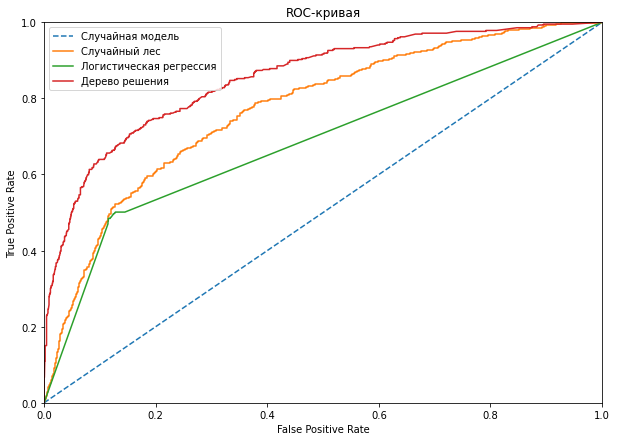

In [46]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

Значение площади под кривой. На сколько наша модель отличается от случайной

Лучшее значение метрики auc roc=0.853 у модели Random forest

**Общий вывод:**

Рассматривая данные с учетом дисбаланса + переведенные категориальные + стандартизированные данные и без учета дисбаланса тремя моделями можно сделать вывод, что самая лучшая модель оказалась Random forest. При лучшем значении max_depth=17, n_estimators=49, мы имеем F1 меру =0.639 на тестовой выборке. 